In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data =  pd.read_csv('/content/imdb_urdu_reviews.csv')
#test =   pd.read_csv('/content/imdb_urdu_reviews_test.csv')
print('Shape of Training Set ' , data.shape,'\nShape of Testing Set ', data.shape)

Shape of Training Set  (50000, 2) 
Shape of Testing Set  (50000, 2)


In [ ]:
#data =  pd.concat([train, test]).reset_index(drop=True)
#print(data.shape)

(50000, 2)


In [ ]:
df =  data.copy()

In [ ]:
df.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


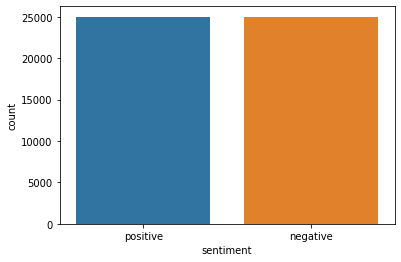

In [ ]:
sns.countplot( x = 'sentiment', data = df );

In [ ]:
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment,encoded_sentiments
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,1
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,0
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,1
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,0
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['encoded_sentiments'], test_size = 0.20, random_state = 1000)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (40000,)
Shape of X_test (10000,)
Shape of Y_train (40000,)
Shape of Y_test (10000,)


In [ ]:
from sklearn.metrics import accuracy_score
import pickle
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)
SVM = svm.LinearSVC(max_iter=100)
model=SVM.fit(train_vecs, Y_train)
test_predictionSVM = SVM.predict(test_vecs)
acc=('Accuracy is {} '.format(accuracy_score(Y_test, test_predictionSVM)))
print(acc)
filename='urdu_sentiment_model.sav'
pickle.dump(model, open(filename, 'wb'))

Accuracy is 0.871 
